<a href="https://colab.research.google.com/github/SumathiGit/NLP-2/blob/main/ML_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("smsspamcollection.tsv", sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
len(df)

5572

In [4]:
#MAchine learning models needs complete data..To check is there any missing values in the data it shows 1
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [6]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

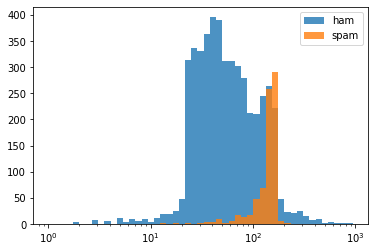

In [7]:
#Visualizing the data to compare

import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [8]:
#Spliting the dataset into traaining and testing dataset
from sklearn.model_selection import train_test_split

# Create Feature and Label sets,note the double set of brackets
X = df[['length','punct']]  
# y is our label(spam and ham)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) #We are gonna take 30 % of our data for the dtesting dataset , Using random_state to select random rows in our dataset

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape: (3733, 2)
Testing Data Shape:  (1839, 2)


In [ ]:
#so we have 3733 random rows of data with 2 columns which is the length and punctuation

In [ ]:
"""One of the simplest multi-class classification tools is logistic regression.
Scikit-learn offers a variety of algorithmic solvers;
we'll use L-BFGS."""

In [9]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs')

lr_model.fit(X_train, y_train) #Fit the model into out training data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
#now the model is ready to predict 
#We are using our testing dataset which is the one the model didn't use


from sklearn import metrics

# Create a prediction set:
predictions = lr_model.predict(X_test)


In [11]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [12]:
y_test #checking our true values 

3245    ham
944     ham
1044    ham
2484    ham
812     ham
       ... 
4944    ham
3313    ham
3652    ham
14      ham
4758    ham
Name: label, Length: 1839, dtype: object

In [13]:
#Next step is to compare the prdiction against y_test(true values)

In [14]:
""" Print a confusion matrix [TP,TN
                              FP,FN]"""
print(metrics.confusion_matrix(y_test,predictions))

[[1547   46]
 [ 241    5]]


In [15]:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,1547,46
spam,241,5


In [17]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.92      1593
        spam       0.10      0.02      0.03       246

    accuracy                           0.84      1839
   macro avg       0.48      0.50      0.47      1839
weighted avg       0.76      0.84      0.80      1839



In [16]:
# Print the overall accuracy #We got 84.3%
print(metrics.accuracy_score(y_test,predictions)) 

0.843936922240348


In [18]:
""" Trying different models in scikit learn family"""

from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [19]:
predictions = nb_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1583   10]
 [ 246    0]]


In [20]:
#Now we got 86 % of accuracy
print(metrics.accuracy_score(y_test,predictions)) 

0.8607939097335509


In [22]:
"""Support Vector Mechanism from scikit learn"""
from sklearn.svm import SVC
svc_model = SVC(gamma='auto')
svc_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
predictions = svc_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1515   78]
 [ 131  115]]


In [24]:
#Now we get 88% of accuracy
print(metrics.accuracy_score(y_test,predictions))

0.8863512778684067
